In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import os
import os.path

In [2]:
#import matplotlib.font_manager
#print ([f.name for f in matplotlib.font_manager.fontManager.ttflist])

In [3]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

font = {'family' : 'Ubuntu',
        'weight' : 'bold',
        'size'   : SMALL_SIZE}

plt.rc('font', **font)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#plt.rcdefaults()

In [5]:
# to get all the file names
cwd = os.getcwd()+"/"
all_txt_files = []
for file in os.listdir(cwd):
    if '.txt' in file:
        all_txt_files.append(file)
    else:
        pass
print (all_txt_files)

['auxsen_vincent_marius_CD.txt', 'auxsen_vincent_marius_tm.txt', 'blank_bufferA_CD.txt', 'edu_kenny_TrpR_CD.txt', 'edu_kenny_trpt_tm.txt', 'sensor1_markus_mercedes_CD.txt', 'sensor1_markus_mercedes_tm.txt', 'sensor2_katharina_julia_CD.txt', 'sensor2_katharina_julia_tm.txt', 'sensor3_lukas_kilian_CD.txt', 'sensor3_lukas_kilian_tm.txt']


In [4]:
# to convert the txt to a clear lookin' csv
for file in all_txt_files:
    #in_txt = csv.reader(open(file, "r"), delimiter = '\t')
    #first_data_out = csv.writer(open("CSV"+file[:-4]+"1.csv", "w"))
    #second_data_out = csv.writer(open("CSV"+file[:-4]+"2.csv", "w"))
    
    first_data_out.writerows([[file]])
    second_data_out.writerows([[file]])
    head_flag = 0
    for i in in_txt:
        if head_flag == 0:
            if i[0] == "XYDATA":
                first_data_out.writerows([i])
                head_flag = 1
            elif i[0] == "XYDATA1":
                first_data_out.writerows([i])
                head_flag = 1
            else:
                pass
        elif head_flag == 1:
            if i[0] == "XYDATA2":
                second_data_out.writerows([i])
                head_flag = 2
            else:
                first_data_out.writerows([i])
        elif head_flag == 2:

            second_data_out.writerows([i])
        else:
            pass

NameError: name 'first_data_out' is not defined

In [5]:
all_csv_files = []
for file in os.listdir(cwd):
    if '.csv' in file:
        all_csv_files.append(file)
    else:
        pass

In [6]:
print (all_csv_files)

['CSVsensor2_katharina_julia_CD1.csv', 'CSVauxsen_vincent_marius_CD1.csv', 'CSVauxsen_vincent_marius_tm1.csv', 'CSVsensor3_lukas_kilian_tm1.csv', 'CSVsensor2_katharina_julia_CD2.csv', 'CSVsensor2_katharina_julia_tm1.csv', 'CSVsensor1_markus_mercedes_tm1.csv', 'CSVedu_kenny_TrpR_CD2.csv', 'CSVauxsen_vincent_marius_CD2.csv', 'CSVsensor3_lukas_kilian_CD1.csv', 'CSVedu_kenny_trpt_tm1.csv', 'CSVsensor1_markus_mercedes_CD1.csv', 'CSVsensor1_markus_mercedes_CD2.csv', 'CSVedu_kenny_TrpR_CD1.csv', 'CSVblank_bufferA_CD1.csv', 'CSVsensor3_lukas_kilian_CD2.csv']


In [7]:
#TrpR first
cd_trpR_wt = pd.read_csv('CSVedu_kenny_TrpR_CD1.csv', header=1, usecols=[0,1,2,3,4,5])
ht_trpR_wt = pd.read_csv('CSVedu_kenny_TrpR_CD2.csv', header=1, usecols=[0,1,2,3,4,5])
tm_trpR_wt = pd.read_csv('CSVedu_kenny_trpt_tm1.csv', sep=',', header=None, skiprows=2)
tm_trpR_wt.columns = ["Temp(C)","CD(mdeg)","HT(V)"]

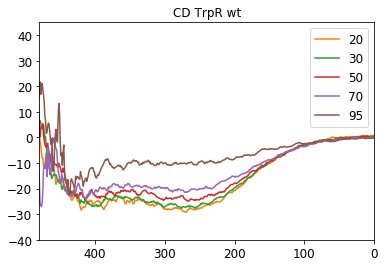

In [8]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
cd_graph = cd_trpR_wt.plot(title="CD TrpR wt", xlim=(480,0), ylim=(-40,45))
lines, labels = cd_graph.get_legend_handles_labels()
cd_graph.legend(lines[1:], labels[1:], loc='best')

### calculating the mean residue molar ellipticity

$$ [\theta] = \frac{\theta * 100 * M}{C * l * n} $$

$[\theta]$ : mean residue molar ellipticity 

$\theta$ :  ellipticity in degrees (mdeg) ---> need to divide by 1000

$M$ : Molecular mass (g/mol)  --> 1 Da = 1 g/mol

$C$ : concentration (mg/ml)  --> 0,2 mg/ml

$l$ : optical path (cm)    --> 1 cm

$n$ : number of residues

In [9]:
cd_trpR_wt_2 = cd_trpR_wt.copy()
cd_trpR_wt_2['20'] = cd_trpR_wt_2['20']*0.2*13400
cd_trpR_wt_2['30'] = cd_trpR_wt_2['30']*0.2*13400
cd_trpR_wt_2['50'] = cd_trpR_wt_2['50']*0.2*13400
cd_trpR_wt_2['70'] = cd_trpR_wt_2['70']*0.2*13400
cd_trpR_wt_2['95'] = cd_trpR_wt_2['95']*0.2*13400

In [24]:
cd_trpR_wt_2.columns = ["XYDATA1","20°C","30°C","50°C","70°C","95°C"]
cd_trpR_wt_2.head()

,XYDATA1,20°C,30°C,50°C,70°C,95°C
0,250.0,2217.03000,1994.87944,93.377900,-144.165776,-83.371852
1,249.9,1487.41876,1458.33004,39.938432,-313.324160,-234.026176
2,249.8,1185.23536,1305.11444,-12.993283,-143.098600,-558.083200
3,249.7,1269.22924,1524.89856,-316.808160,149.823792,-646.287360
4,249.6,961.45000,1529.87264,-214.100108,183.580000,-860.561400


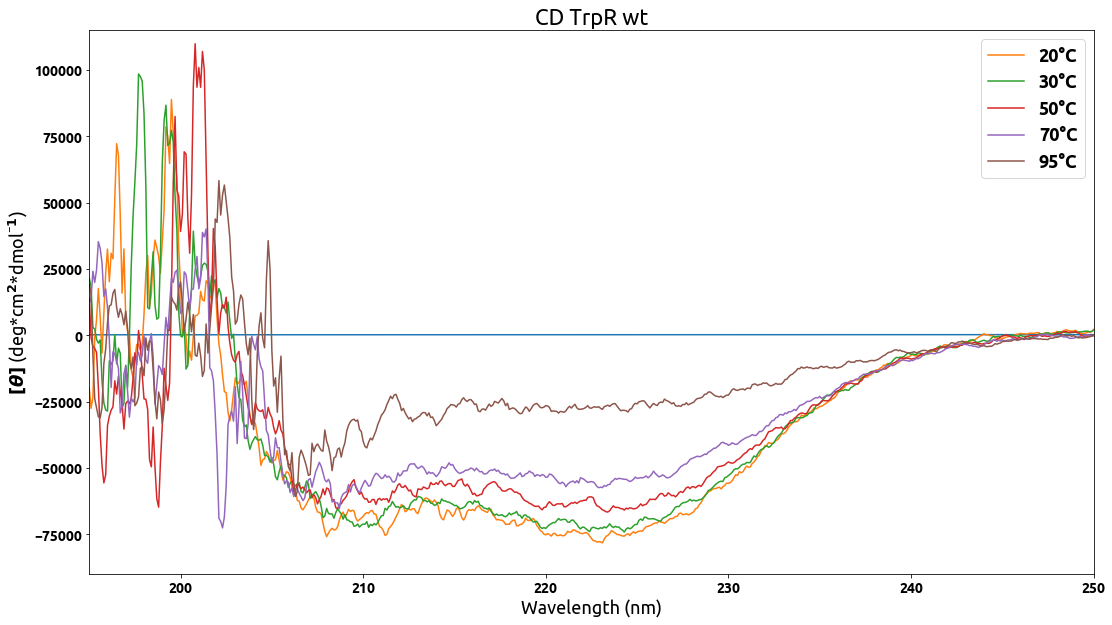

In [34]:
cd_graph_2 = cd_trpR_wt_2.plot(title="CD TrpR wt", figsize=(18, 10), 
                               x=cd_trpR_wt["XYDATA1"],
                               xlim=(195,250), ylim=(-90000,115000))
lines, labels = cd_graph_2.get_legend_handles_labels()
cd_graph_2.legend(lines[1:], labels[1:], loc='best')
cd_graph_2.set_xlabel("Wavelength (nm)")
cd_graph_2.set_ylabel("$[\\theta]$ (deg*cm$^{2}$*dmol$^{⁻1}$)")
plt.savefig('TrpR_wt_cd.pdf', bbox_inches='tight')

In [50]:
ht_trpR_wt.columns = ["XYDATA2","20°C","30°C","50°C","70°C","95°C"]
ht_trpR_wt.tail()

,XYDATA2,20°C,30°C,50°C,70°C,95°C
546,195.4,1008.35,1007.80,1007.42,1007.26,1006.99
547,195.3,1008.35,1007.80,1007.41,1007.26,1006.99
548,195.2,1008.35,1007.80,1007.41,1007.26,1006.99
549,195.1,1008.34,1007.80,1007.41,1007.25,1006.99
550,195.0,1008.34,1007.79,1007.40,1007.25,1006.99


Text(0,0.5,'high tension [V]')

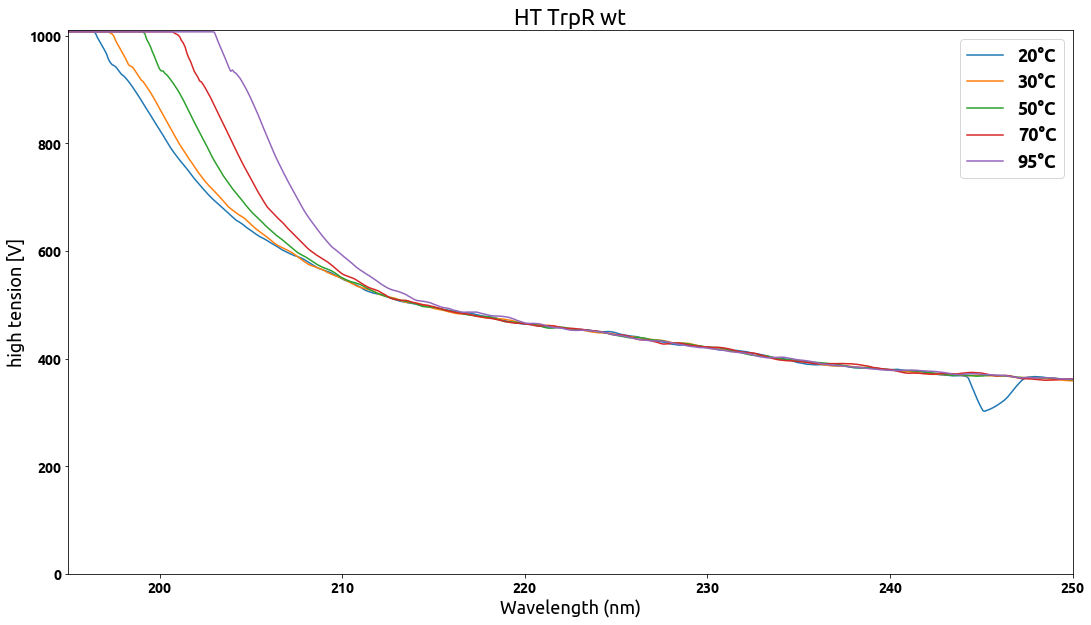

In [55]:
ht_graph = ht_trpR_wt[["20°C","30°C","50°C","70°C","95°C"]].plot(title="HT TrpR wt", figsize=(18, 10), 
                               x=ht_trpR_wt["XYDATA2"],
                               xlim=(195,250), ylim=(0,1010))
lines, labels = ht_graph.get_legend_handles_labels()
ht_graph.legend(lines[:], labels[:], loc='best')
ht_graph.set_xlabel("Wavelength (nm)")
ht_graph.set_ylabel("high tension [V]")

In [53]:
tm_trpR_wt.head()
#["Temp(C)","CD(mdeg)","HT(V)"]

,Temp(C),CD(mdeg),HT(V)
0,20.0,-24.8278,358.854
1,20.5,-25.1791,361.466
2,21.0,-25.3219,359.711
3,21.5,-24.6575,363.765
4,22.0,-24.8577,364.279


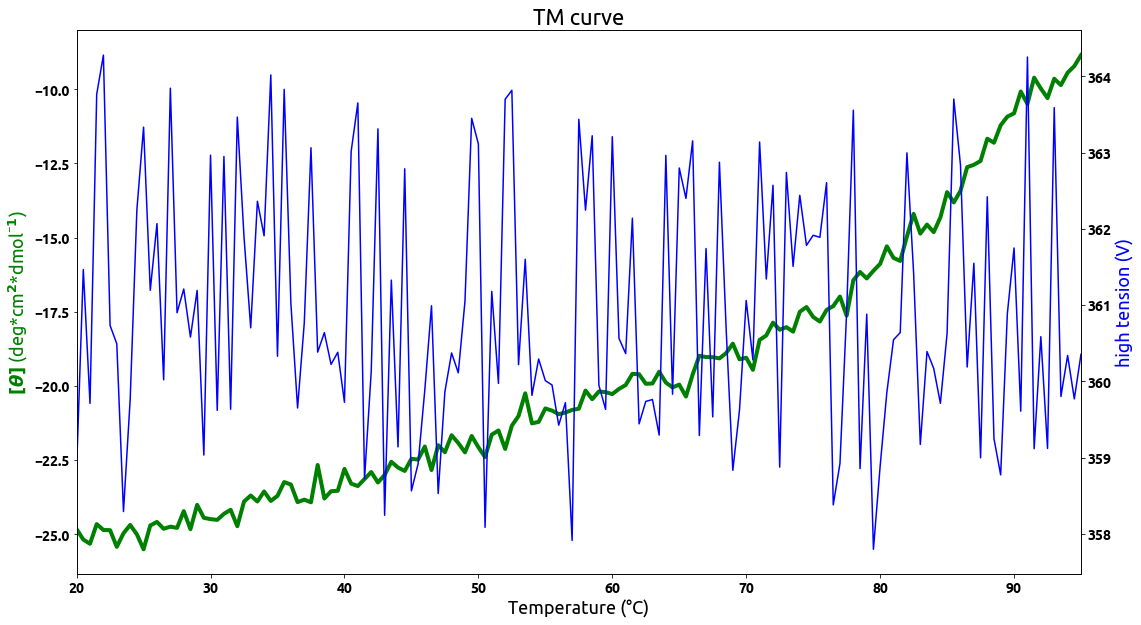

In [80]:
fig, ax1 = plt.subplots(figsize=(18, 10))
plt.title("TM curve")
ax2 = ax1.twinx()

ax1.plot(tm_trpR_wt["Temp(C)"], tm_trpR_wt["CD(mdeg)"], 'g-', linewidth=4)
ax2.plot(tm_trpR_wt["Temp(C)"], tm_trpR_wt["HT(V)"], 'b-')

ax1.set_xlim([20,95])
#ax1.set_ylim([20,100])
#ax1.set_ylim([20,100])

ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('$[\\theta]$ (deg*cm$^{2}$*dmol$^{⁻1}$)', color='g')
ax2.set_ylabel('high tension (V)', color='b')

plt.show()